In [37]:
%reload_ext autoreload
%autoreload 2

import sklearn
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
from godec.godec import godec
from sdp import *
import tqdm
import time

In [3]:
import scipy as sp

In [66]:
MSE_sdp = []
MSE_cardinality = []
MSE_godec = []

sparsity = {
    "cardinality": [],
    "godec": [],
    "sdp": [],
}

ranks = {
    "cardinality": [],
    "godec": [],
    "sdp": [],
}

runtimes = {
    "cardinality": [],
    "godec": [],
    "sdp": [],
}

condition_numbers = []

tol=1e-3

n = 100

pp_vals = 1000*np.ones(n, dtype=int)
r_vals = np.linspace(2, 50, n).astype(int)
s_vals = 0.1*np.ones(n)

for pp, r, s in zip(pp_vals, r_vals, s_vals):

    for X in np.random.randn(1, pp, pp):
        print(np.linalg.cond(X))
        condition_numbers.append(np.linalg.cond(X))
        # Solve SDP
        start = time.time()
        L_sdp, S_sdp, LS_sdp, err_sdp = svd_cardinality(X, r, card=s tol=tol)
        end = time.time()
        runtimes["sdp"].append(end-start)
        MSE_sdp.append(err_sdp)

        # Solve GoDec
        start = time.time()
        L_godec, S_godec, LS_godec, err_godec = godec.godec(X, r, tol=tol)
        end = time.time()
        runtimes["godec"].append(end-start)
        MSE_godec.append(err_godec)

        # Solve cardinality
        start = time.time()
        L_cardinality, S_cardinality, LS_cardinality, err_cardinality = svd_cardinality(X, r, tol=tol)
        end = time.time()
        runtimes["cardinality"].append(end-start)
        MSE_cardinality.append(err_cardinality)

        # Save sparsity
        sparsity["cardinality"].append(np.sum(np.abs(S_cardinality) > 1e-5)/pp**2)
        sparsity["godec"].append(np.sum(np.abs(S_godec) > 1e-5)/pp**2)
        sparsity["sdp"].append(np.sum(np.abs(S_sdp) > 1e-5)/pp**2)

        # Save ranks
        ranks["cardinality"].append(np.linalg.matrix_rank(L_cardinality))
        ranks["godec"].append(np.linalg.matrix_rank(L_godec))
        ranks["sdp"].append(np.linalg.matrix_rank(L_sdp))

4966.153411515808
iter:  1 error:  2.3997309525868452e-17
iter:  1 error:  2.464412775300857e-17
iter:  1 error:  2.4205533324027323e-17
99975.44739901474
iter:  1 error:  3.2686028196691625e-17
iter:  1 error:  3.2779230595761674e-17
iter:  1 error:  3.26763634645196e-17
13504.663508607435
iter:  1 error:  3.588372229940264e-17
iter:  1 error:  3.593450284186876e-17
iter:  1 error:  3.592908548977542e-17
3577.702262156099
iter:  1 error:  3.829539301717777e-17
iter:  1 error:  3.808987761379644e-17
iter:  1 error:  3.8254729020975204e-17
10163.765361745302
iter:  1 error:  3.9581013035326024e-17
iter:  1 error:  3.978608364008357e-17
iter:  1 error:  3.962236885661e-17
10325.358427803214
iter:  1 error:  4.0539514934272827e-17
iter:  1 error:  4.052327159507439e-17
iter:  1 error:  4.04680057988409e-17
1998.7263354637346
iter:  1 error:  4.113153692671739e-17
iter:  1 error:  4.1209282192440225e-17
iter:  1 error:  4.1165828656346524e-17
11305.404524489384
iter:  1 error:  4.159131275

In [55]:
MSE_godec[0]

[2.4430271349972676e-17]

In [56]:
MSE_sdp[0]

[2.441793061208568e-17]

In [57]:
mse_cardinality[0]

NameError: name 'mse_cardinality' is not defined

Text(0, 0.5, 'Log error')

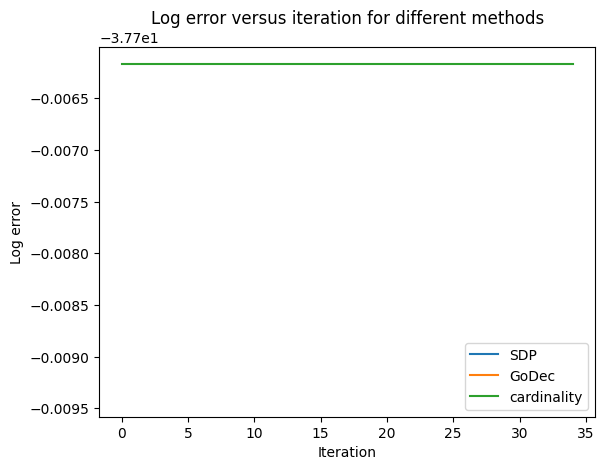

In [61]:
plt.plot(np.log(MSE_sdp[:][-1]), label='SDP')
plt.plot(np.log(MSE_godec[:][-1]), label='GoDec')
# plt.plot(np.log(np.repeat(MSE_godec[-1], 35)), label='GoDec')
plt.plot(np.log(np.repeat(MSE_cardinality[-1], 35)), label='cardinality')
plt.legend()
plt.title('Log error versus iteration for different methods')
plt.xlabel('Iteration')
plt.ylabel('Log error')

Text(0, 0.5, 'Log Runtime')

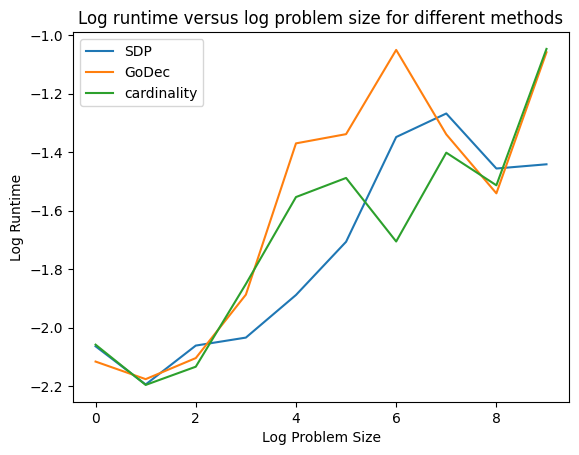

In [59]:
# plot log runtimes
plt.plot(np.log(runtimes["sdp"]), label='SDP')
plt.plot(np.log(runtimes["godec"]), label='GoDec')
plt.plot(np.log(runtimes["cardinality"]), label='cardinality')
plt.legend()
plt.title('Log runtime versus log problem size for different methods')
plt.xlabel('Log Problem Size')
plt.ylabel('Log Runtime')

Text(0, 0.5, 'Sparsity')

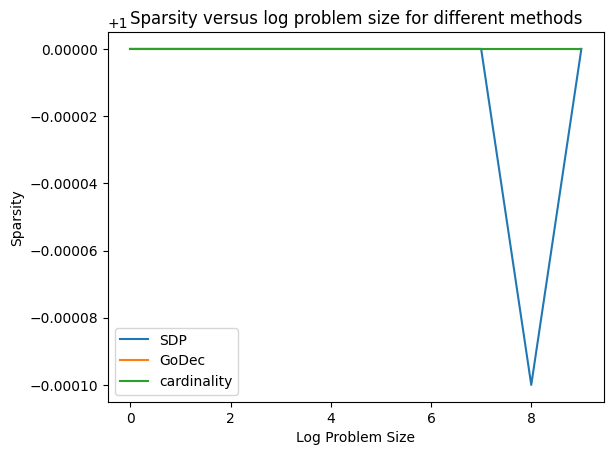

In [52]:
# plot sparsity
plt.plot(sparsity["sdp"], label='SDP')
plt.plot(sparsity["godec"], label='GoDec')
plt.plot(sparsity["cardinality"], label='cardinality')

plt.legend()
plt.title('Sparsity versus log problem size for different methods')
plt.xlabel('Log Problem Size')
plt.ylabel('Sparsity')


Text(0, 0.5, 'Log Sparsity')

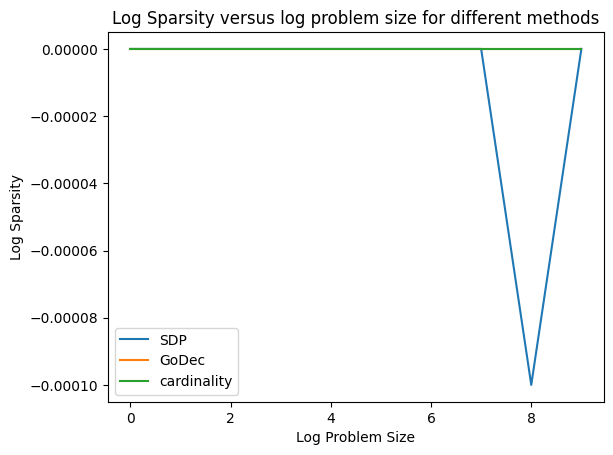

In [53]:
# plot log sparsity 
plt.plot(np.log(sparsity["sdp"]), label='SDP')
plt.plot(np.log(sparsity["godec"]), label='GoDec')
plt.plot(np.log(sparsity["cardinality"]), label='cardinality')

plt.legend()
plt.title('Log Sparsity versus log problem size for different methods')
plt.xlabel('Log Problem Size')
plt.ylabel('Log Sparsity')


In [ ]:
# plot ranks
plt.plot(ranks["sdp"], label='SDP')
plt.plot(ranks["godec"], label='GoDec')
plt.plot(ranks["cardinality"], label='cardinality')

plt.legend()

plt.title('Rank versus log problem size for different methods')
plt.xlabel('Log Problem Size')
plt.ylabel('Rank')

Finding sets of (A, B) pairs that satisfy

In [4]:
def T(M, num_samples=10):
    U, _, Vt = np.linalg.svd(M, full_matrices=False)
    V = Vt.T
    n, m = M.shape
    res = set()
    for _ in range(num_samples):
        X = np.random.rand(U.T.shape) * 2 - 1
        Y = np.random.rand(Vt.T.shape) * 2 - 1
        T = U @ X.T + Y @ Vt
        res.add(T)
    return list(res)

def Omega(M, num_samples=10):
    res = set()
    nz_idx = np.nonzero(M)
    for _ in range(num_samples):
        N = np.zeros_like(M)
        for i, j in zip(*nz_idx):
            if np.random.rand() < 0.5:
                N[i, j] = M[i, j]
        res.add(N)
    return list(res)

def zeta(M):
    matrices_T = T(M)

    # U, S, Vt = np.linalg.svd(M)
    # X = cp.Variable(U.T.shape)
    # Y = cp.Variable(Vt.T.shape)
    # N = cp.Variable(M.shape)
    max_inf_norm = 0
    for N in matrices_T:
        problem = cp.Problem(cp.Maximize(cp.pnorm(N, 'inf')), 
            constraints=[  # constrain N to be in T(M)
                # cp.matmul(U, cp.transpose(X)) + cp.matmul(Y, Vt) == N,
                cp.norm(N, 2) <= 1  # infinity norm constraint
            ]   
        )
        
        problem.solve()
        max_inf_norm = max(max_inf_norm, problem.value)

    return max_inf_norm

def mu(M):
    matrices_Omega = Omega(M)
    
    # supp = np.where(M != 0)
    max_spectral_norm = 0
    for N in matrices_Omega:

        # X = cp.Variable(M.shape)
        # N = cp.Variable(M.shape)

        problem = cp.Problem(cp.Maximize(cp.norm(N, 2)),
            constraints=[
                # N == supp*X,  # constrain N to be in Omega
                cp.pnorm(N, 'inf') <= 1
            ]
        )

        problem.solve()
        max_spectral_norm = max(max_spectral_norm, problem.value)

    return max_spectral_norm

def find_matrices(M, num_trials=1000):
    valid_decompositions = []
    n, m = M.shape

    for _ in range(num_trials):
        A = np.random.rand(n, m)
        B = M - A

        if zeta_cp(A) * mu(B) < 1/6:
            valid_decompositions.append((A, B))

    return valid_decompositions

M = np.random.rand(10, 10)
decompositions = find_matrices(M)
print(f"Found {len(decompositions)} decompositions!")

NameError: name 'zeta_cp' is not defined

In [15]:
import numpy as np
import cvxpy as cp

def T(M, num_samples=1000):
    U, _, Vt = np.linalg.svd(M, full_matrices=False)
    n, m = M.shape
    res = []
    for _ in range(num_samples):
        X = np.random.rand(m, n) * 2 - 1
        Y = np.random.rand(n, m) * 2 - 1
        T = U @ X + Y @ Vt
        res.append(T.tolist())
    return res

def Omega(M, num_samples=1000):
    res = []
    nz_idx = np.nonzero(M)
    for _ in range(num_samples):
        N = np.zeros_like(M)
        for i, j in zip(*nz_idx):
            if np.random.rand() < 0.5:
                N[i, j] = M[i, j]
        res.append(N.tolist())
    return res

def zeta(M):
    matrices_T = T(M)
    max_inf_norm = 0
    for N_array in matrices_T:
        N = cp.Parameter(shape=M.shape, value=N_array)
        problem = cp.Problem(cp.Minimize(-cp.norm(N, 'inf')),
            constraints=[cp.norm(N, 2) <= 1])
        problem.solve()
        if problem.value is not None:
            max_inf_norm = max(max_inf_norm, -problem.value)
    return max_inf_norm

def mu(M):
    matrices_Omega = Omega(M)
    max_spectral_norm = 0
    for N_array in matrices_Omega:
        N = cp.Parameter(shape=M.shape, value=N_array)
        problem = cp.Problem(cp.Maximize(cp.norm(N, 2)),
                             constraints=[cp.norm(N, 'inf') <= 1])
        problem.solve()
        if problem.value is not None:
            print("Sol found")
            max_spectral_norm = max(max_spectral_norm, problem.value)
    return max_spectral_norm

def make_sparse_matrix(n, m, sparsity_level=0.9):
    """
    Create a sparse matrix of shape (n, m) where sparsity_level indicates
    the fraction of elements that are zero.
    """
    A = np.random.rand(n, m)
    mask = np.random.rand(n, m) > sparsity_level
    A *= mask
    return A

def find_matrices(n, r, sparsity_level=0.1, num_trials=1000):
    valid_decompositions = set()
    m = n

    for _ in tqdm.trange(num_trials):
        A = make_sparse_matrix(n, n, sparsity_level=sparsity_level)
        B = np.random.rand(n, r) @ np.random.rand(r, m)

        if zeta(A) * mu(B) < 1/6:
            valid_decompositions.add((A, B))

    return valid_decompositions

M = np.random.rand(10, 10)
decompositions = find_matrices(20, 10, sparsity_level=0.1, num_trials=10)
print(f"Found {len(decompositions)} decompositions!")

Found 10 decompositions!


In [23]:
decompositions[0][0]

array([[0.92440518, 0.22508147, 0.84216015, 0.12085688, 0.79570296,
        0.59165257, 0.53419797, 0.        , 0.04820525, 0.88811159,
        0.49502487, 0.46301096, 0.2514476 , 0.50004722, 0.29080033,
        0.37712894, 0.4331771 , 0.01345898, 0.75289454, 0.03002371],
       [0.1859604 , 0.0872685 , 0.73907165, 0.63759266, 0.        ,
        0.68687613, 0.41114968, 0.48071327, 0.28408094, 0.        ,
        0.24902822, 0.04252069, 0.81869008, 0.96787353, 0.02504765,
        0.12854374, 0.25057184, 0.55421385, 0.        , 0.65091401],
       [0.22720691, 0.9075648 , 0.        , 0.82542108, 0.66365393,
        0.57220135, 0.53000374, 0.85234913, 0.74924153, 0.35175321,
        0.        , 0.28700229, 0.9387937 , 0.        , 0.15987969,
        0.21285432, 0.16755787, 0.        , 0.8489611 , 0.24349934],
       [0.84403813, 0.        , 0.40459479, 0.29795517, 0.69466368,
        0.08800777, 0.7022299 , 0.94427466, 0.75384564, 0.58913692,
        0.        , 0.        , 0.40185902, 0

In [24]:
[np.linalg.cond(A+B) for A, B in decompositions]

[6152.94046643569,
 11193.081735968202,
 3050.591460022756,
 781.8686523045226,
 2068.065447971858,
 5926.862335881706,
 490.4399590106972,
 985.1358054642092,
 45055.977440368566,
 475.06954165618293]

Text(0.5, 1.0, '$\\kappa({A+B})$ for different decompositions')

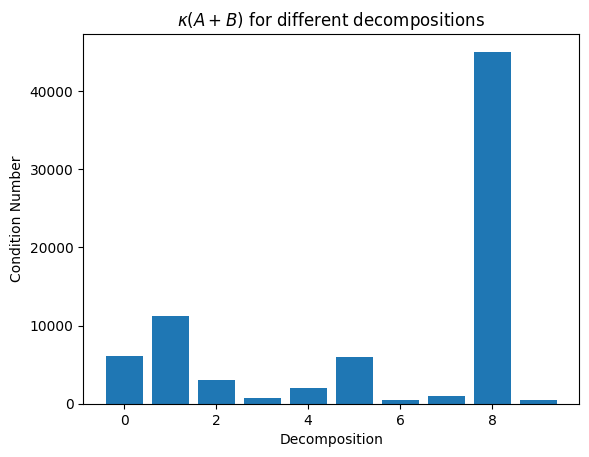

In [26]:
# Plot bar chart of condition numbers
plt.bar(range(len(decompositions)), [np.linalg.cond(A+B) for A, B in decompositions])
plt.xlabel('Decomposition')
plt.ylabel('Condition Number')
plt.title('$\kappa({A+B})$ for different decompositions')